In [1]:
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
import numpy as np
import pickle
import random 
from surprise import accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from surprise import NMF, CoClustering, SVD

In [3]:
random.seed(10)

In [5]:
ratings = pd.read_csv('ml-latest/ratings.csv')
#print(ratings.head())
movies = pd.read_csv("movies_FINAL.csv")
#print(movies.head())

In [6]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[["userId", "movieId", "rating"]], reader)

In [7]:
trainset, testset = train_test_split(data, test_size=.2)

In [7]:
#algo = SVD()
#algo.fit(trainset)
#pickle.dump(algo, open(filename, 'wb'))

In [8]:
filename = 'SVD_model.sav'
algo = pickle.load(open(filename, 'rb'))

In [9]:
algo.predict(1, 307, r_ui =3.5,verbose=True)

user: 1          item: 307        r_ui = 3.50   est = 3.98   {'was_impossible': False}


Prediction(uid=1, iid=307, r_ui=3.5, est=3.976031439838299, details={'was_impossible': False})

In [10]:
predictions = algo.test(testset)

In [11]:
predictions

[Prediction(uid=58123, iid=923, r_ui=3.5, est=3.5215887695410975, details={'was_impossible': False}),
 Prediction(uid=110352, iid=1019, r_ui=3.5, est=3.4478952393394757, details={'was_impossible': False}),
 Prediction(uid=190794, iid=2948, r_ui=3.5, est=2.862551144149458, details={'was_impossible': False}),
 Prediction(uid=247557, iid=4069, r_ui=4.0, est=3.6810180524248675, details={'was_impossible': False}),
 Prediction(uid=240991, iid=3826, r_ui=3.5, est=3.097623889869993, details={'was_impossible': False}),
 Prediction(uid=215638, iid=608, r_ui=5.0, est=4.980266132343433, details={'was_impossible': False}),
 Prediction(uid=1158, iid=3070, r_ui=3.0, est=3.673436398824378, details={'was_impossible': False}),
 Prediction(uid=175769, iid=2082, r_ui=1.0, est=3.1293703236134283, details={'was_impossible': False}),
 Prediction(uid=1170, iid=3793, r_ui=2.5, est=2.272318707460502, details={'was_impossible': False}),
 Prediction(uid=110789, iid=908, r_ui=4.0, est=4.512741558581674, details={'

In [8]:
def isLiked(pred):
    return (pred.r_ui>3.5)*1

In [9]:
def isRecommended(pred):
    return (pred.est>3.5)*1

In [14]:
recommend = list(map(isRecommended, predictions))

In [15]:
liked = list(map(isLiked, predictions))

In [16]:
cm =confusion_matrix(liked, recommend)

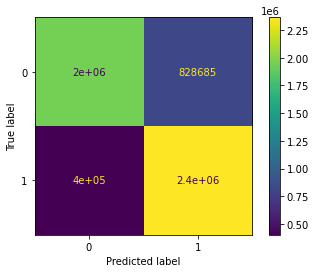

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [18]:
accuracy_score(liked, recommend)

0.7781911398747074

In [19]:
precision_score(liked, recommend, average='binary')

0.7404934065280226

In [20]:
#rmse for rating prediction NOT recommendation
accuracy.rmse(predictions)

RMSE: 0.7030


0.7029522380735811

In [21]:
#algo2 = NMF()
#algo2.fit(trainset)
#pickle.dump(algo, open(filename2, 'wb'))

In [22]:
filename2 = 'NMF_model.sav'
algo2 = pickle.load(open(filename2, 'rb'))

In [23]:
predictions2 = algo2.test(testset)

In [24]:
recommend2 = list(map(isRecommended, predictions2))

In [25]:
cm2 =confusion_matrix(liked, recommend2)

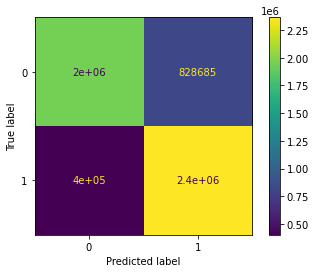

In [26]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.show()

In [27]:
accuracy_score(liked, recommend2)

0.7781911398747074

In [28]:
precision_score(liked, recommend2, average='binary')

0.7404934065280226

In [29]:
algo2.predict(1, 307, r_ui =3.5,verbose=True)

user: 1          item: 307        r_ui = 3.50   est = 3.98   {'was_impossible': False}


Prediction(uid=1, iid=307, r_ui=3.5, est=3.976031439838299, details={'was_impossible': False})

In [30]:
predictions2 = algo2.test(testset)
accuracy.rmse(predictions2)

RMSE: 0.7030


0.7029522380735811

In [ ]:
#d = data.build_full_trainset()

In [ ]:
#algo4 = CoClustering()
#algo4.fit(d)
#pickle.dump(algo4, open(filename3, 'wb'))

In [11]:
filename3 = 'Cluster_model.sav'
algo3 = pickle.load(open(filename3, 'rb'))

In [12]:
predictions3 = algo3.test(testset)

In [13]:
recommend3 = list(map(isRecommended, predictions3))

In [15]:
cm3 =confusion_matrix(liked, recommend3)

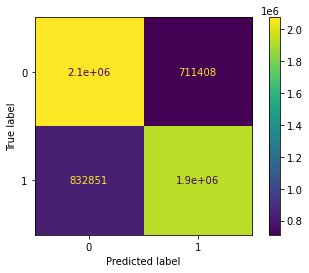

In [16]:
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot()
plt.show()

In [17]:
accuracy_score(liked, recommend3)

0.7217896733180331

In [18]:
precision_score(liked, recommend3, average='binary')

0.7310525352758023

In [20]:
predictions3 = algo3.test(testset)
accuracy.rmse(predictions3)

RMSE: 0.8765


0.87648006846097

SVD - RMSE: 0.7950 - 910 MB
NMF - RMSE: 0.8777 - 910 MB
CoClustering - RMSE: 0.8759 - 824 MB